In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as plt
import numpy as np
from matplotlib import cm

In [2]:
df_lu = pd.read_csv("Luxembourg_new.csv")
df_de = pd.read_csv("Deutschland_new.csv")
df_be = pd.read_csv("Belgien_new.csv")
df_fr = pd.read_csv("Frankreich_new.csv")

In [3]:
features_lu = ['Distanz','Grundstücksfläche','Schlafzimmer','Badezimmer','Parkplätze','Haus']
features_fr = ['Baujahr','Grundstücksfläche','Garten','Schlafzimmer','Parkplätze','Badezimmer','Haus']
features_be = ['Grundstücksfläche','Schlafzimmer','Badezimmer','Parkplätze','Haus']
features_de = ['Baujahr','DistanzKöln','DistanzLuxemburg','Grundstücksfläche','Schlafzimmer','Badezimmer','Haus']

In [4]:
#Daten skalieren

#Features extrahieren
x = df_lu.loc[:, features_lu].values

#Zielvariable extrahieren
y = df_lu.loc[:,['Kaufpreis']].values 

# Features Standardizieren
x = StandardScaler().fit_transform(x)

In [5]:
#Hauptkomponentenanalyse mit 2 Hauptkomponenten (2D Projektion)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df_lu[['Kaufpreis']]], axis = 1)

array([0.5347491 , 0.17874887])

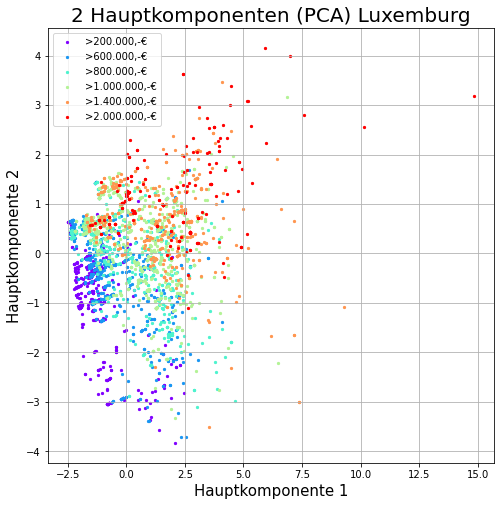

In [6]:
#2D Projektion visualisieren
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Hauptkomponente 1', fontsize = 15)
ax.set_ylabel('Hauptkomponente 2', fontsize = 15)
ax.set_title('2 Hauptkomponenten (PCA) Luxemburg', fontsize = 20)

targets = [200000,600000,800000,1000000,1400000,2000000]
upperLimits = [600000,800000,1000000,1400000,2000000,40000000]
titles = [">200.000,-€",">600.000,-€",">800.000,-€",">1.000.000,-€",">1.400.000,-€",">2.000.000,-€"]

xyz = np.arange(6)
ys = [i+xyz+(i*xyz)**2 for i in range(6)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
pos = 0

for target,limit,color in zip(targets,upperLimits,colors):
    indicesToKeep = (finalDf['Kaufpreis'] >= target) & (finalDf['Kaufpreis'] <= limit)
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , color = color
               , s = 5)
    pos = pos + 1
ax.legend(titles)
ax.grid()

pca.explained_variance_ratio_


In [7]:
#Daten skalieren

#Features extrahieren
x = df_de.loc[:, features_de].values

#Zielvariable extrahieren
y = df_de.loc[:,['Kaufpreis']].values 

# Features Standardizieren
x = StandardScaler().fit_transform(x)

In [8]:
#Hauptkomponentenanalyse mit 2 Hauptkomponenten (2D Projektion)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df_de[['Kaufpreis']]], axis = 1)

array([0.39002162, 0.18989452])

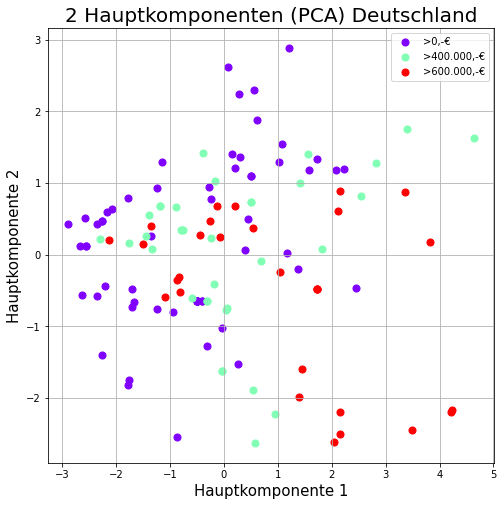

In [9]:
#2D Projektion visualisieren
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Hauptkomponente 1', fontsize = 15)
ax.set_ylabel('Hauptkomponente 2', fontsize = 15)
ax.set_title('2 Hauptkomponenten (PCA) Deutschland', fontsize = 20)

targets = [0,400000,600000]
upperLimits = [400000,600000,15000000]
titles = [">0,-€",">400.000,-€",">600.000,-€"]

xyz = np.arange(3)
ys = [i+xyz+(i*xyz)**2 for i in range(3)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
pos = 0

for target,limit,color in zip(targets,upperLimits,colors):
    indicesToKeep = (finalDf['Kaufpreis'] >= target) & (finalDf['Kaufpreis'] <= limit)
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , color = color
               , s = 50)
    pos = pos + 1
ax.legend(titles)
ax.grid()
pca.explained_variance_ratio_


In [10]:
#Daten skalieren

#Features extrahieren
x = df_fr.loc[:, features_fr].values

#Zielvariable extrahieren
y = df_fr.loc[:,['Kaufpreis']].values 

# Features Standardizieren
x = StandardScaler().fit_transform(x)

In [11]:
#Hauptkomponentenanalyse mit 2 Hauptkomponenten (2D Projektion)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df_de[['Kaufpreis']]], axis = 1)

array([0.44213126, 0.18449646])

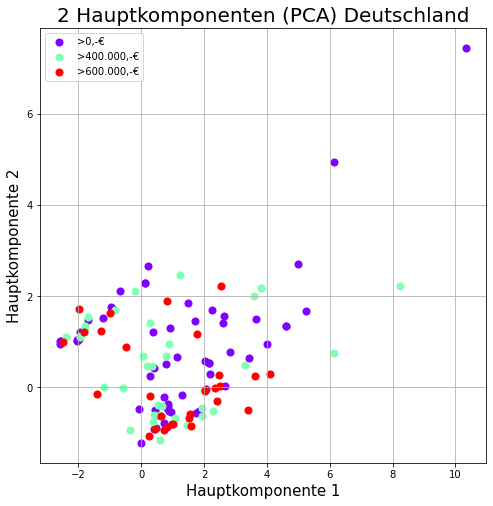

In [12]:
#2D Projektion visualisieren
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Hauptkomponente 1', fontsize = 15)
ax.set_ylabel('Hauptkomponente 2', fontsize = 15)
ax.set_title('2 Hauptkomponenten (PCA) Frankreich', fontsize = 20)

targets = [0,400000,600000]
upperLimits = [400000,600000,15000000]
titles = [">0,-€",">400.000,-€",">600.000,-€"]

xyz = np.arange(3)
ys = [i+xyz+(i*xyz)**2 for i in range(3)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
pos = 0

for target,limit,color in zip(targets,upperLimits,colors):
    indicesToKeep = (finalDf['Kaufpreis'] >= target) & (finalDf['Kaufpreis'] <= limit)
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , color = color
               , s = 50)
    pos = pos + 1
ax.legend(titles)
ax.grid()
pca.explained_variance_ratio_


In [13]:
#Daten skalieren

#Features extrahieren
x = df_be.loc[:, features_be].values

#Zielvariable extrahieren
y = df_be.loc[:,['Kaufpreis']].values 

# Features Standardizieren
x = StandardScaler().fit_transform(x)

In [14]:
#Hauptkomponentenanalyse mit 2 Hauptkomponenten (2D Projektion)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df_be[['Kaufpreis']]], axis = 1)

array([0.51661858, 0.21491528])

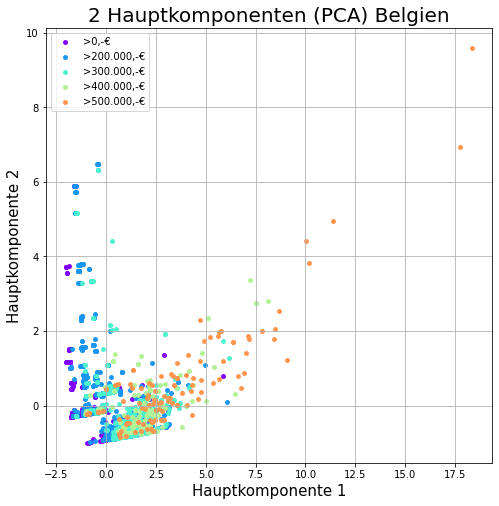

In [15]:
#2D Projektion visualisieren
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Hauptkomponente 1', fontsize = 15)
ax.set_ylabel('Hauptkomponente 2', fontsize = 15)
ax.set_title('2 Hauptkomponenten (PCA) Belgien', fontsize = 20)

targets = [0,200000,300000,400000,500000]
upperLimits = [200000,300000,400000,500000,1500000]
titles = [">0,-€",">200.000,-€",">300.000,-€",">400.000,-€",">500.000,-€"]

xyz = np.arange(5)
ys = [i+xyz+(i*xyz)**2 for i in range(6)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
pos = 0

for target,limit,color in zip(targets,upperLimits,colors):
    indicesToKeep = (finalDf['Kaufpreis'] >= target) & (finalDf['Kaufpreis'] <= limit)
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , color = color
               , s = 15)
    pos = pos + 1
ax.legend(titles)
ax.grid()
pca.explained_variance_ratio_
